## Análise de Preços de Combustíveis por Bairro na Capital

### Seu desafio é investigar os valores praticados nos bairros da capital do estado do Rio de Janeiro no primeiro semestre de 2025 sobre venda de gasolina comum.
### Identifique quais bairros apresentam valores de venda significativamente diferentes da maioria. Para isso, analise a distribuição dos preços e determine quais bairros merecem atenção especial por estarem fora do padrão observado.
### Ao final, discuta qual medida de tendência central (média ou mediana) representa melhor o comportamento dos preços nessa análise e justifique sua escolha com base na distância entre média e mediana.

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
petroleo = pd.read_csv('Preços semestrais - AUTOMOTIVOS_2025.01.csv', sep = ';')
petroleo

C:\Users\leticya.franca\AppData\Local\Temp\ipykernel_43400\1769830188.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  petroleo = pd.read_csv('Preços semestrais - AUTOMOTIVOS_2025.01.csv', sep = ';')


,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,NE,CE,SOBRAL,ECONOGÁS DO BRASIL DIST. DERIV. DE PET. BIOC. ...,08.775.979/0002-62,RUA TABELIÃO IDELFONSO CAVALCANTI,455,NaN,CENTRO,62010-000,GASOLINA,01/01/2025,"6,29",NaN,R$ / litro,RAIZEN
1,NE,CE,SOBRAL,ECONOGÁS DO BRASIL DIST. DERIV. DE PET. BIOC. ...,08.775.979/0002-62,RUA TABELIÃO IDELFONSO CAVALCANTI,455,NaN,CENTRO,62010-000,GASOLINA ADITIVADA,01/01/2025,"6,49",NaN,R$ / litro,RAIZEN
2,NE,CE,SOBRAL,ECONOGÁS DO BRASIL DIST. DERIV. DE PET. BIOC. ...,08.775.979/0002-62,RUA TABELIÃO IDELFONSO CAVALCANTI,455,NaN,CENTRO,62010-000,DIESEL S10,01/01/2025,"6,19",NaN,R$ / litro,RAIZEN
3,NE,CE,SOBRAL,ECONOGÁS DO BRASIL DIST. DERIV. DE PET. BIOC. ...,08.775.979/0002-62,RUA TABELIÃO IDELFONSO CAVALCANTI,455,NaN,CENTRO,62010-000,ETANOL,01/01/2025,"5,19",NaN,R$ / litro,RAIZEN
4,NE,CE,SOBRAL,V.C.EMPREENDIMENTOS LTDA,03.551.935/0002-35,AVENIDA JOSE EUCLIDES FERREIRA GOMES,30,POSTO FLASH,CORACAO DE JESUS,62043-070,GASOLINA,01/01/2025,"6,53",NaN,R$ / litro,RAIZEN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
429519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
429520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
429521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
petroleo["Valor de Venda"] = (petroleo["Valor de Venda"] .str.replace(",", ".", regex=False).astype(float))                       

# .str.replace(",", ".", regex=False)  # troca vírgula por ponto
# .astype(float)) # converte para número

In [45]:
capital_rj = ['RJ']
produto = ['GASOLINA']

capital = petroleo.loc[(petroleo['Estado - Sigla'].isin (capital_rj)) & (petroleo['Produto'].isin(produto))]
capital

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
55,SE,RJ,CAMPOS DOS GOYTACAZES,POSTO DE COMBUSTIVEIS CONTORNO DE CAMPOS LTDA,31.212.889/0002-85,AVENIDA NILO PECANHA,614,/822 PATIO,PQ SANTO AMARO,28030-035,GASOLINA,01/01/2025,6.49,NaN,R$ / litro,VIBRA
58,SE,RJ,CAMPOS DOS GOYTACAZES,POSTO DE COMBUSTIVEIS B J LTDA,06.211.735/0001-40,RUA BENEDITO QUEIROZ,1,NaN,TURF CLUB,28024-040,GASOLINA,01/01/2025,6.42,NaN,R$ / litro,BRANCA
62,SE,RJ,CAMPOS DOS GOYTACAZES,CORDEIRO BARROSO PETROLEO LTDA,05.064.564/0001-01,AVENIDA VINTE E OITO DE MARCO,458,NaN,CENTRO,28020-740,GASOLINA,01/01/2025,6.49,NaN,R$ / litro,VIBRA
66,SE,RJ,CAMPOS DOS GOYTACAZES,POSTO DE SERVICOS SAO SALVADOR LTDA,28.875.086/0002-04,AVENIDA DEPUTADO ALAIR FERREIRA,109,ANEXO 113,TURFF CLUB,28010-810,GASOLINA,01/01/2025,6.49,NaN,R$ / litro,IPIRANGA
70,SE,RJ,CAMPOS DOS GOYTACAZES,POSTO DE SERVICOS SAO SALVADOR LTDA,28.875.086/0001-15,RODOVIA SOUTO MAIOR,182,NaN,GOITACAZES,28148-000,GASOLINA,01/01/2025,6.43,NaN,R$ / litro,IPIRANGA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419575,SE,RJ,BARRA MANSA,POSTO DE COMBUSTIVEIS GUAPURUVU LTDA,22.793.239/0001-07,RODOVIA LUCIO MEIRA (BR-393),S/N,KM 293,MORADA DA GRANJA,27335-000,GASOLINA,30/06/2025,6.19,NaN,R$ / litro,BRANCA
419810,SE,RJ,RESENDE,ALDEIAS DA SERRA COMERCIO DE COMBUSTIVEL E SER...,28.635.816/0001-00,RUA HOSTILIO DE SOUZA,1403,QUADRAB1 LOTE 9,VILA ITAPUCA,27524-040,GASOLINA,30/06/2025,6.19,NaN,R$ / litro,BRANCA
419991,SE,RJ,VOLTA REDONDA,LBL POSTO DE SERVICOS EIRELI,28.695.135/0001-38,AVENIDA AMARAL PEIXOTO,957,NaN,CENTRO,27253-223,GASOLINA,30/06/2025,6.49,NaN,R$ / litro,RAIZEN
420093,SE,RJ,NOVA FRIBURGO,F.MURY DESIGN PROPAGANDA E PUBLICIDADE LTDA,07.707.130/0002-99,ESTRADA FRIBURGO AMPARO,15604,LP N 0130/2018 LP N 0440/2019,CHACARA PARAISO,28605-520,GASOLINA,30/06/2025,6.78,NaN,R$ / litro,VIBRA


In [46]:
bairros_capital = ['ANCHIETA','BANGU','BARRA DA TIJUCA','BENFICA','BONSUCESSO','BOTAFOGO','BRAZ DE PINA',
'CAJU','CAMPO GRANDE','CATUMBI','CENTRO','CIDADE DE DEUS','COPACABANA','DEL CASTILHO','ENGENHO DE DENTRO','ENGENHO NOVO',
'ESTACIO','ESTÁCIO','FLAMENGO','FREGUESIA (JACAREPAGUA)','GAVEA','GLORIA','GRAJAU','GUADALUPE','ILHA DO FUNDÃO','IPANEMA',
'ITANHANGA','JACAREPAGUA','JACAREPAGUÁ','JARDIM  GUANABARA-ILHA DO GOVERNADOR','JARDIM BOTANICO','JARDIM CARIOCA','LAGOA',
'LARANJEIRAS','LEBLON','OLARIA','PACIENCIA','PADRE MIGUEL','PARQUE FLAMENGO','PECHINCHA','PENHA','PILARES','PRACA SECA',
'RAMOS','RECREIO DOS BANDEIR','RECREIO DOS BANDEIRANTES','RIO COMPRIDO','ROCHA MIRANDA','SANTA CRUZ','SANTISSIMO',
'SAO CRISTOVAO','SÃO CRISTÓVÃO','TAQUARA','TIJUCA','VARGEM PEQUENA','VASCO DA GAMA','VILA DA PENHA','VISTA ALEGRE']

bairro = capital.loc[(capital['Bairro'].isin (bairros_capital))]
bairro



,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
62,SE,RJ,CAMPOS DOS GOYTACAZES,CORDEIRO BARROSO PETROLEO LTDA,05.064.564/0001-01,AVENIDA VINTE E OITO DE MARCO,458,NaN,CENTRO,28020-740,GASOLINA,01/01/2025,6.49,NaN,R$ / litro,VIBRA
87,SE,RJ,CAMPOS DOS GOYTACAZES,TOP SET AUTO POSTO LTDA,28.346.559/0001-97,AVENIDA OSWALDO CARDOSO DE MELO,295,0,CENTRO,28030-110,GASOLINA,01/01/2025,6.49,NaN,R$ / litro,IPIRANGA
95,SE,RJ,CAMPOS DOS GOYTACAZES,CAMPOS GAROUPA LTDA.,03.581.079/0002-60,AVENIDA 15 DE NOVEMBRO,353,NaN,CENTRO,28030-002,GASOLINA,01/01/2025,6.44,NaN,R$ / litro,BRANCA
96,SE,RJ,CAMPOS DOS GOYTACAZES,REDE ENERGIA LTDA,03.433.342/0001-93,RUA ALBERTO LAMEGO,895/,905,CENTRO,28015-622,GASOLINA,01/01/2025,6.44,NaN,R$ / litro,BRANCA
939,SE,RJ,MACAE,POSTO TITAN DE MACAE LTDA,05.374.546/0001-26,AVENIDA ALUIZIO DA SILVA GOMES,56,NaN,GLORIA,27930-560,GASOLINA,02/01/2025,6.39,NaN,R$ / litro,VIBRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418417,SE,RJ,NOVA FRIBURGO,A C TRANCOZO M B COMBUSTIVEIS LTDA,12.972.278/0001-00,AVENIDA PRESIDENTE COSTA E SILVA,11,NaN,CENTRO,28630-000,GASOLINA,30/06/2025,6.69,NaN,R$ / litro,RAIZEN
418635,SE,RJ,BARRA MANSA,AUTO POSTO SATURNO BM LTDA,11.790.069/0001-82,RUA PINTO RIBEIRO,385,NaN,CENTRO,27310-420,GASOLINA,30/06/2025,6.19,NaN,R$ / litro,ALE
418838,SE,RJ,RIO DE JANEIRO,AUTO POSTO LUAR DA RIO SANTOS II LTDA,11.217.808/0001-41,ESTRADA DO GUANDU ESQ.C/ BR 101,SN,KM 388 AREA REM III LOTE 210 SENTIDO RJ,SANTA CRUZ,23560-150,GASOLINA,30/06/2025,5.79,NaN,R$ / litro,RAIZEN
419210,SE,RJ,RIO DE JANEIRO,AUTO POSTO LUAR DA RIO SANTOS I LTDA,11.103.499/0001-89,ESTRADA DO GANDU ESQ C/BR101,SN,KM 388 AREA REM I LOTE 209 SENTIDO ANGRA,SANTA CRUZ,23560-150,GASOLINA,30/06/2025,5.89,NaN,R$ / litro,RAIZEN


In [47]:
preco = bairro.groupby('Bairro')['Valor de Venda'].sum().reset_index()
preco

,Bairro,Valor de Venda
0,ANCHIETA,41.81
1,BANGU,71.98
2,BARRA DA TIJUCA,2339.72
3,BENFICA,276.44
4,BONSUCESSO,128.35
5,BOTAFOGO,647.47
6,BRAZ DE PINA,11.37
7,CAJU,140.17
8,CAMPO GRANDE,1967.16
9,CATUMBI,133.70


In [48]:
vendas_array = np.array(preco['Valor de Venda'])

In [49]:
media = np.mean(vendas_array)
mediana = np.median(vendas_array)

q1 = np.percentile(vendas_array, 25)
q2 = np.percentile(vendas_array, 50)
q3 = np.percentile(vendas_array, 75)
distancia = (media - mediana) / mediana 

iqr = q3 - q1

limite_superior = q3 + (1.5 * iqr)
limite_inferior = q1 - (1.5 * iqr)

print(f'Media: {media:.2f}')
print(f'Mediana: {mediana}')
print(f'Distancia: {distancia * 100:.2f}%')
print(f'Primeiro quartil (Q1): {q1}')
print(f'Segundo quartil (Q2, Mediana): {q2}')
print(f'Terceiro quartil geral (Q3): {q3}')

Media: 359.31
Mediana: 138.92000000000002
Distancia: 158.64%
Primeiro quartil (Q1): 55.985
Segundo quartil (Q2, Mediana): 138.92000000000002
Terceiro quartil geral (Q3): 200.76


In [50]:
outlier_bairro = preco.loc[preco['Valor de Venda'] >= limite_superior]
outlier_bairro.sort_values(by = 'Valor de Venda', ascending = False)

,Bairro,Valor de Venda
10,CENTRO,7034.88
2,BARRA DA TIJUCA,2339.72
8,CAMPO GRANDE,1967.16
27,JACAREPAGUA,1271.81
48,SANTA CRUZ,798.29
5,BOTAFOGO,647.47
15,ENGENHO NOVO,541.88
13,DEL CASTILHO,430.87


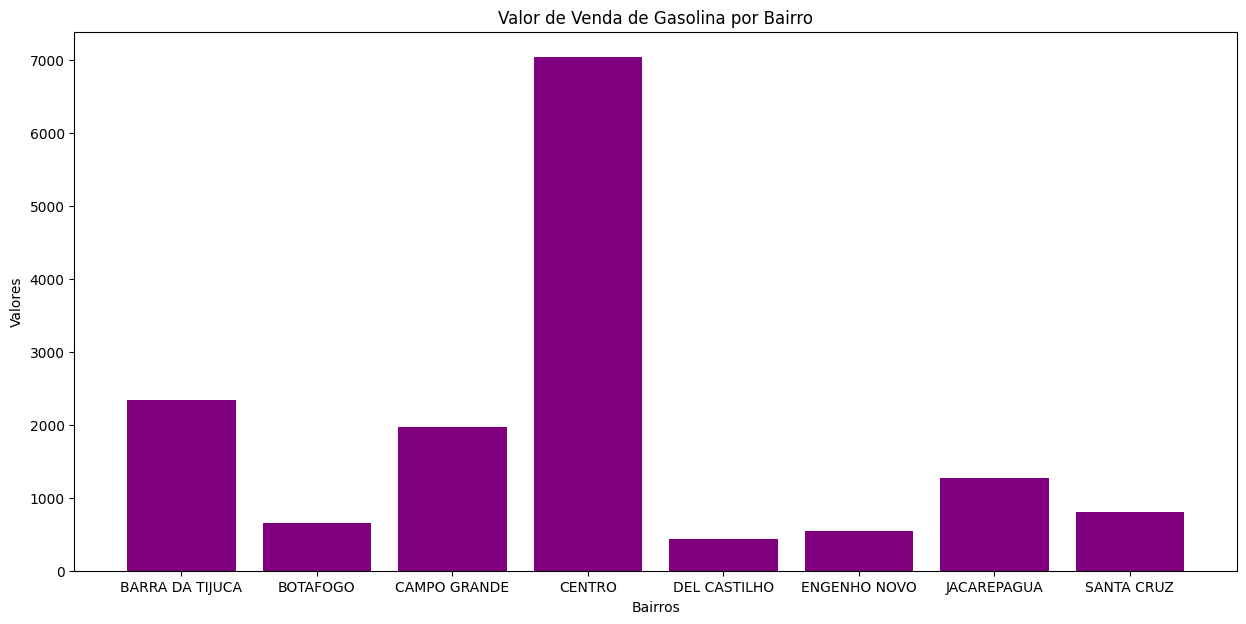

In [51]:
bairros = outlier_bairro['Bairro']
valores = outlier_bairro['Valor de Venda']

plt.figure(figsize = (15,7))
plt.bar(bairros, valores, color = 'purple')
plt.title('Valor de Venda de Gasolina por Bairro')
plt.xlabel('Bairros')
plt.ylabel('Valores')
plt.show()

In [52]:
# Após analise, concluo por meio de calculos estatisticos, que a melhor medida de tendencia central a ser usada é a 
# a mediana, com distancia de 158%, posso afirmar q a media sofre grande influencia de valores extremos por bairro.

## Comparação de Preços de Combustíveis entre Municípios do Estado do RJ

### explore os preços de gasolina comum praticado em diferentes municípios do estado do Rio de Janeiro. Seu objetivo é identificar quais municípios se destacam por apresentarem valores de venda que destoam do padrão estadual. 
### Analise a distribuição dos preços e destaque os municípios que merecem investigação mais aprofundada.
### Ao final, avalie se a média ou a mediana é mais adequada para representar

In [53]:
municipios_rj = petroleo[petroleo["Estado - Sigla"] == "RJ"]
municipios_rj

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
54,SE,RJ,CAMPOS DOS GOYTACAZES,POSTO DE COMBUSTIVEIS CONTORNO DE CAMPOS LTDA,31.212.889/0002-85,AVENIDA NILO PECANHA,614,/822 PATIO,PQ SANTO AMARO,28030-035,GNV,01/01/2025,5.39,NaN,R$ / m³,VIBRA
55,SE,RJ,CAMPOS DOS GOYTACAZES,POSTO DE COMBUSTIVEIS CONTORNO DE CAMPOS LTDA,31.212.889/0002-85,AVENIDA NILO PECANHA,614,/822 PATIO,PQ SANTO AMARO,28030-035,GASOLINA,01/01/2025,6.49,NaN,R$ / litro,VIBRA
56,SE,RJ,CAMPOS DOS GOYTACAZES,POSTO DE COMBUSTIVEIS CONTORNO DE CAMPOS LTDA,31.212.889/0002-85,AVENIDA NILO PECANHA,614,/822 PATIO,PQ SANTO AMARO,28030-035,GASOLINA ADITIVADA,01/01/2025,6.69,NaN,R$ / litro,VIBRA
57,SE,RJ,CAMPOS DOS GOYTACAZES,POSTO DE COMBUSTIVEIS CONTORNO DE CAMPOS LTDA,31.212.889/0002-85,AVENIDA NILO PECANHA,614,/822 PATIO,PQ SANTO AMARO,28030-035,ETANOL,01/01/2025,4.79,NaN,R$ / litro,VIBRA
58,SE,RJ,CAMPOS DOS GOYTACAZES,POSTO DE COMBUSTIVEIS B J LTDA,06.211.735/0001-40,RUA BENEDITO QUEIROZ,1,NaN,TURF CLUB,28024-040,GASOLINA,01/01/2025,6.42,NaN,R$ / litro,BRANCA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420095,SE,RJ,NOVA FRIBURGO,F.MURY DESIGN PROPAGANDA E PUBLICIDADE LTDA,07.707.130/0002-99,ESTRADA FRIBURGO AMPARO,15604,LP N 0130/2018 LP N 0440/2019,CHACARA PARAISO,28605-520,DIESEL S10,30/06/2025,6.69,NaN,R$ / litro,VIBRA
420096,SE,RJ,NOVA FRIBURGO,F.MURY DESIGN PROPAGANDA E PUBLICIDADE LTDA,07.707.130/0002-99,ESTRADA FRIBURGO AMPARO,15604,LP N 0130/2018 LP N 0440/2019,CHACARA PARAISO,28605-520,ETANOL,30/06/2025,5.05,NaN,R$ / litro,VIBRA
420152,SE,RJ,NITEROI,POSTO DE COMBUSTIVEIS GIGANTE DA ALAMEDA LTDA.,21.599.015/0001-98,ALAMEDA SAO BOAVENTURA,133,NaN,FONSECA,24130-005,GASOLINA,30/06/2025,5.69,NaN,R$ / litro,RAIZEN
420153,SE,RJ,NITEROI,POSTO DE COMBUSTIVEIS GIGANTE DA ALAMEDA LTDA.,21.599.015/0001-98,ALAMEDA SAO BOAVENTURA,133,NaN,FONSECA,24130-005,GASOLINA ADITIVADA,30/06/2025,5.69,NaN,R$ / litro,RAIZEN


In [54]:
municipios = municipios_rj.groupby('Municipio')['Valor de Venda'].sum().reset_index()
municipios

,Municipio,Valor de Venda
0,ANGRA DOS REIS,4516.12
1,ARARUAMA,5270.23
2,BARRA DO PIRAI,3627.25
3,BARRA MANSA,7140.87
4,BELFORD ROXO,5243.54
5,CABO FRIO,5426.23
6,CAMPOS DOS GOYTACAZES,7399.27
7,DUQUE DE CAXIAS,7990.40
8,ITABORAI,7799.46
9,ITAPERUNA,4673.65


In [55]:
municipios_array = np.array(municipios['Valor de Venda'])

In [56]:
media = np.mean(municipios_array)
mediana = np.median(municipios_array)
distancia = (media - mediana) / mediana 

q1 = np.percentile(municipios_array, 25)
q2 = np.percentile(municipios_array, 50)
q3 = np.percentile(municipios_array, 75)

iqr = q3 - q1
limite_superior = q3 + (1.5 * iqr)
limite_inferior = q1 - (1.5 * iqr)

print(f'Media: {media:.2f}')
print(f'Mediana: {mediana}')
print(f'Distancia: {distancia * 100:.2f}%')
print(f'Primeiro quartil (Q1): {q1}')
print(f'Segundo quartil (Q2, Mediana): {q2}')
print(f'Terceiro quartil geral (Q3): {q3}')

Media: 7757.06
Mediana: 5994.24
Distancia: 29.41%
Primeiro quartil (Q1): 4506.610000000001
Segundo quartil (Q2, Mediana): 5994.24
Terceiro quartil geral (Q3): 7817.33


In [57]:
outlier_municipio = municipios.loc[municipios['Valor de Venda'] >= limite_superior]
outlier_municipio.sort_values(by = 'Valor de Venda', ascending = False)

,Municipio,Valor de Venda
19,RIO DE JANEIRO,48441.55


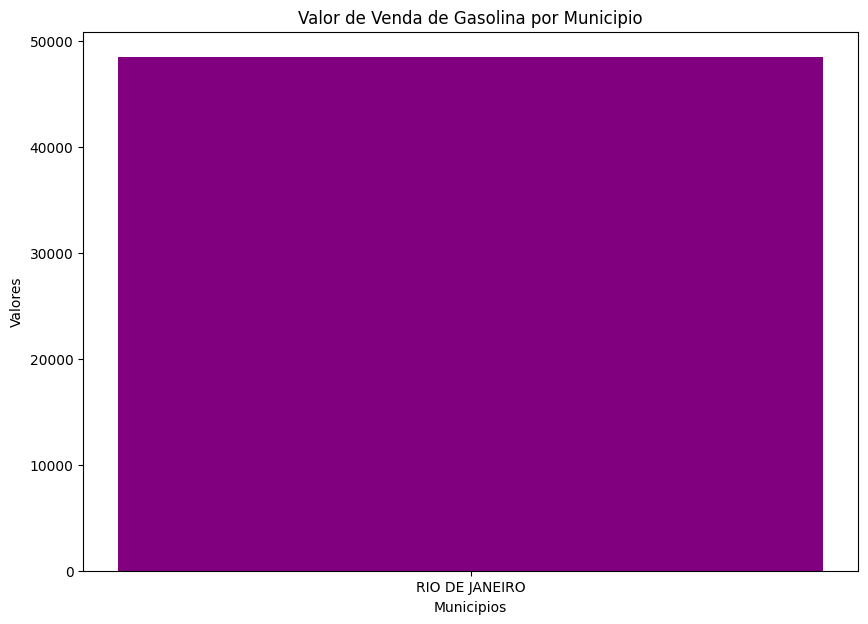

In [58]:
municipio = outlier_municipio['Municipio']
valores = outlier_municipio['Valor de Venda']

plt.figure(figsize = (10,7))
plt.bar(municipio, valores, color = 'purple')
plt.title('Valor de Venda de Gasolina por Municipio')
plt.xlabel('Municipios')
plt.ylabel('Valores')
plt.show()

In [59]:
# Após analise, concluo por meio de calculos estatisticos, que a melhor medida de tendencia central a ser usada é a 
# a mediana, com distancia de 29%, posso afirmar q a media sofre grande influencia de valores extremos por municipio 

## Panorama Nacional dos Preços de Combustíveis por Estado

### A partir da base nacional da ANP, examine os preço médio de gasolina comum por estado brasileiro. Identifique quais estados apresentam valores que se afastam do padrão nacional e proponha hipóteses para esses comportamentos.
### Considere aspectos como localização geográfica, logística e políticas regionais.
### Ao final, discuta qual medida de tendência central melhor representa os preços dos combustíveis no Brasil e justifique sua escolha com base na distribuição dos dados.

In [60]:
combustivel_estado = petroleo[petroleo["Produto"] == "GASOLINA"]
combustivel_estado

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,NE,CE,SOBRAL,ECONOGÁS DO BRASIL DIST. DERIV. DE PET. BIOC. ...,08.775.979/0002-62,RUA TABELIÃO IDELFONSO CAVALCANTI,455,NaN,CENTRO,62010-000,GASOLINA,01/01/2025,6.29,NaN,R$ / litro,RAIZEN
4,NE,CE,SOBRAL,V.C.EMPREENDIMENTOS LTDA,03.551.935/0002-35,AVENIDA JOSE EUCLIDES FERREIRA GOMES,30,POSTO FLASH,CORACAO DE JESUS,62043-070,GASOLINA,01/01/2025,6.53,NaN,R$ / litro,RAIZEN
8,NE,CE,SOBRAL,CENTER POSTO COMERCIAL LTDA,02.905.892/0001-03,AVENIDA JOSE ARIMATEIA MONTE E SILVA,425,NaN,CAMPOS DOS VELHOS,62114-000,GASOLINA,01/01/2025,6.69,NaN,R$ / litro,VIBRA
12,NE,CE,SOBRAL,V.C.EMPREENDIMENTOS LTDA,03.551.935/0001-54,AVENIDA MONSENHOR JOSE ALOISIO PINTO,80,LOJA 01,DOM EXPEDITO,62050-255,GASOLINA,01/01/2025,6.69,NaN,R$ / litro,IPIRANGA
16,NE,CE,SOBRAL,POSTO SAO DOMINGOS LTDA,69.366.128/0001-70,AVENIDA DOUTOR GUARANI,854,NaN,JOCELY DANTAS DE ANDRADE TORRES,62042-030,GASOLINA,01/01/2025,6.69,NaN,R$ / litro,RAIZEN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420389,NE,PE,BELO JARDIM,AUTO POSTO GARANHUNS LTDA,70.065.800/0003-38,AVENIDA OSCAR PEREIRA DA SILVA,364,NaN,SANTO ANTONIO,55152-110,GASOLINA,30/06/2025,5.70,NaN,R$ / litro,BRANCA
420392,NE,PE,BELO JARDIM,POSTO CENTRO LTDA,54.096.194/0001-08,PRACA CAPITAO TOMAS FERREIRA,SN,NaN,CENTRO,55150-130,GASOLINA,30/06/2025,5.70,NaN,R$ / litro,LARCO
420396,S,PR,CASCAVEL,POSTO PARAVIS LTDA,03.358.802/0002-47,RUA PARANA,4560,NaN,CENTRO,85810-011,GASOLINA,30/06/2025,6.49,NaN,R$ / litro,VIBRA
420400,NE,BA,SERRINHA,COMERCIO DE COMBUSTIVEIS VEREDAS LTDA,54.003.912/0001-46,RODOVIA BA 409,151 A,QUADRAD LOTE 09,NOVO HORIZONTE - 01,48700-000,GASOLINA,30/06/2025,5.99,NaN,R$ / litro,BRANCA


In [61]:
estados = combustivel_estado.groupby('Estado - Sigla')['Valor de Venda'].mean().reset_index()
estados

,Estado - Sigla,Valor de Venda
0,AC,7.733930
1,AL,6.398823
2,AM,7.300497
3,AP,6.042440
4,BA,6.452381
5,CE,6.446906
6,DF,6.500826
7,ES,6.307678
8,GO,6.295351
9,MA,6.220979


In [62]:
estados_array = np.array(estados['Valor de Venda'])

In [63]:
media = np.mean(estados_array)
mediana = np.median(estados_array)
distancia = (media - mediana) / mediana 

q1 = np.percentile(estados_array, 25)
q2 = np.percentile(estados_array, 50)
q3 = np.percentile(estados_array, 75)

iqr = q3 - q1
limite_superior = q3 + (1.5 * iqr)
limite_inferior = q1 - (1.5 * iqr)

print(f'Media: {media:.2f}')
print(f'Mediana: {mediana}')
print(f'Distancia: {distancia * 100:.2f}%')
print(f'Primeiro quartil (Q1): {q1}')
print(f'Segundo quartil (Q2, Mediana): {q2}')
print(f'Terceiro quartil geral (Q3): {q3}')

Media: 6.46
Mediana: 6.398823088455773
Distancia: 0.95%
Primeiro quartil (Q1): 6.23109820299506
Segundo quartil (Q2, Mediana): 6.398823088455773
Terceiro quartil geral (Q3): 6.4877349378433795


In [64]:
outlier_estado = estados.loc[estados['Valor de Venda'] >= limite_superior]
outlier_estado.sort_values(by = 'Valor de Venda', ascending = False)

,Estado - Sigla,Valor de Venda
0,AC,7.733930
2,AM,7.300497
20,RO,7.003432
21,RR,6.985823


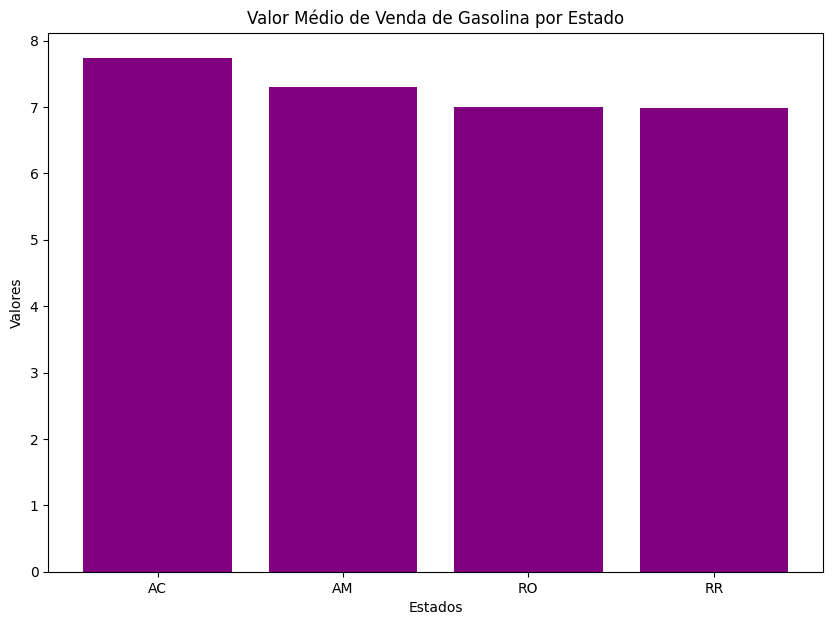

In [65]:
estado = outlier_estado['Estado - Sigla']
valores = outlier_estado['Valor de Venda']

plt.figure(figsize = (10,7))
plt.bar(estado, valores, color = 'purple')
plt.title('Valor Médio de Venda de Gasolina por Estado')
plt.xlabel('Estados')
plt.ylabel('Valores')
plt.show()

In [66]:
#Após analise, concluo por meio de calculos estatisticos, que a melhor medida de tendencia central a ser usada é a a media, com distancia de 0.95%, posso afirmar q a media nao 
# sofre influencia de valores extremos por estado.

In [67]:
## A região Norte (ACRE, AMAZONAS, RONDONIA, RORAIMA): Apresentam preços mais altos porque dependem do transporte fluvial e apresentam longas distâncias até as refinarias. 
# A logística cara eleva o valor final. 